# Lab #9 (`scikit-learn` Classifiers in Recognizing Handwritten Digits)
### By Stakhov K.V. [8.1212]

### Write a program to recognize hand-written digits using `RandomForestClassifier`, `GradientBoostingClassifier`, and `MLPClassifier` from the `scikit-learn` package.

### An input dataset (MNIST represented by pixels values) is split into `train.csv` and `test.csv`. The `train.csv` file includes labeled images, while images in `test.csv` are unlabeled.
### The program must compare an accuracy of classifiers using `accuracy_score()` from `sklearn.metrics`.

### First we'll load the training and testing datatsets and determine the image size:

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

seed = 81212

train = pd.read_csv("../input/mnist-handwritten-digits/train.csv")
test = pd.read_csv("../input/mnist-handwritten-digits/test.csv")
img_size = int(sqrt(test.shape[1]))

print(f"Image size: {img_size}x{img_size} ({test.shape[1]} pixels total)")
print(f"Training data contains {train.shape[0]} labeled images")
print(f"Testing data contains {test.shape[0]} images")

Image size: 28x28 (784 pixels total)
Training data contains 42000 labeled images
Testing data contains 28000 images


### Then, we'll define a function for displaying images from their pixel values and prepare our training data:

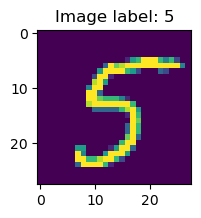

In [3]:
def show_image(images_data, n, label = ""):
    fig, ax = plt.subplots(figsize = (2, 2))
    ax.imshow(
        images_data.iloc[n,:]
            .values
            .reshape(img_size, img_size)
            .astype('uint8')
    )
    ax.set_title(f"{label}")

# Prepare training data
x = train.iloc[:,1:] # Pixel Values
y = train.iloc[:,0]  # Labels

# Split our data 80/20 for cross-validations
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = seed
)

# Display an example digit from the training dataset
show_image(x_train, 100, f"Image label: {y_train.values[100]}")

### Then, we'll define a function that generates predictions using the given classifier on our testing data, evaluates the classifier's accuracy and demonstrates labels predicted for images from the `test` dataset:

In [4]:
def evaluate_classifier(name, mod, demonstrate_n = 20):
    print(name)
    # Make predictions and evaluate accuracy
    pred = mod.predict(x_test)
    print (f"Accuracy Score: {accuracy_score(y_test, pred)}")

    # Predict using test dataset
    pred_test = mod.predict(test)

    # Demonstrate `demonstrate_n` random images with predicted labels
    print(f"Demonstrating {demonstrate_n} predictions for images from `test.csv`")
    for i in random.sample(range(0, len(pred_test)), demonstrate_n):
        show_image(test, i, f"[{name}]\nPredicted label: {pred_test[i]}")

### a. Now we can use the function defined above to evaluate the accuracy of `RandomForestClassifier`:

RandomForestClassifier
Accuracy Score: 0.9627380952380953
Demonstrating 20 predictions for images from `test.csv`


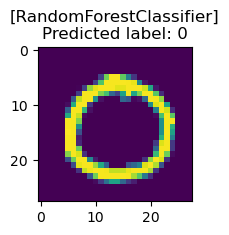

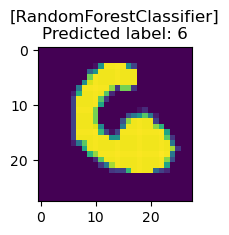

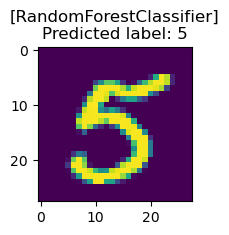

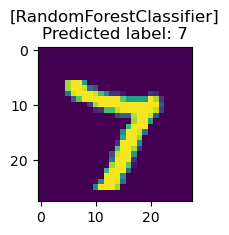

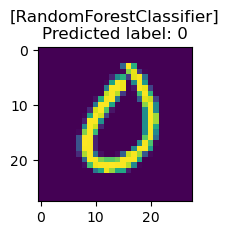

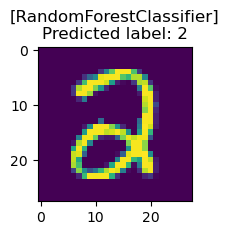

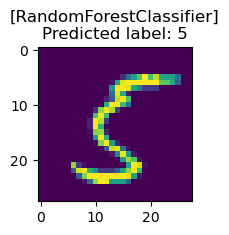

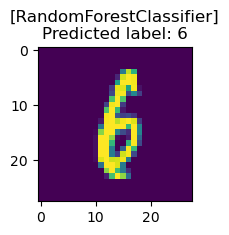

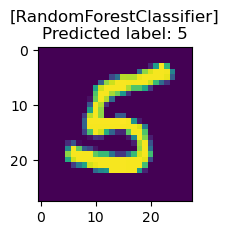

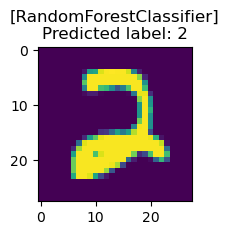

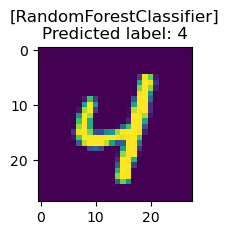

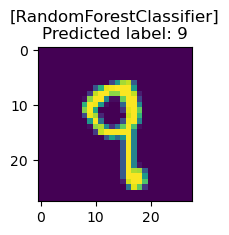

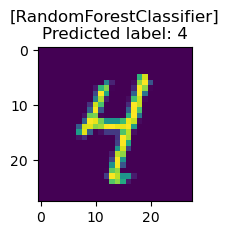

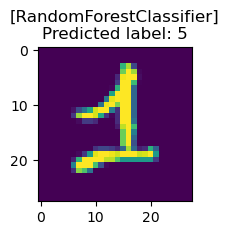

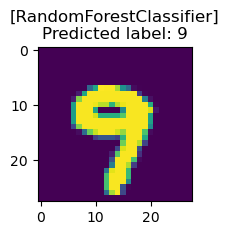

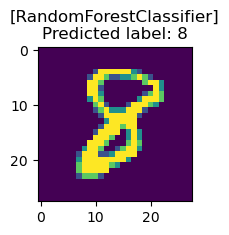

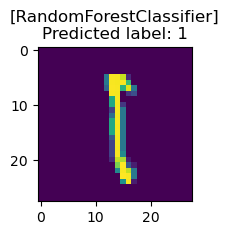

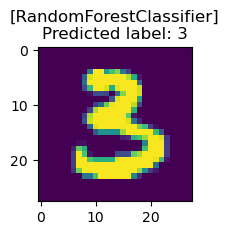

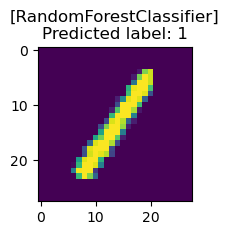

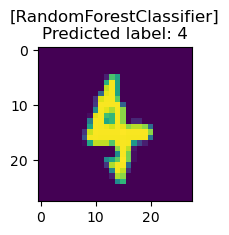

In [6]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)
evaluate_classifier("RandomForestClassifier", mod)

### b. Then we'll fit a `GradientBoostingClassifier`:

GradientBoostingClassifier
Accuracy Score: 0.8005952380952381
Demonstrating 20 predictions for images from `test.csv`


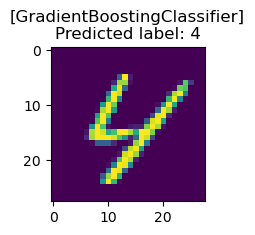

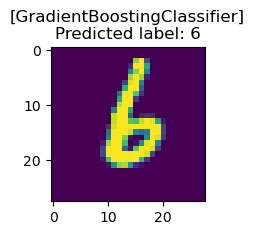

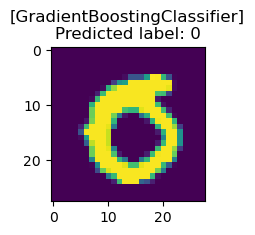

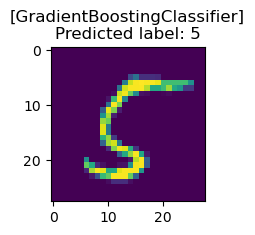

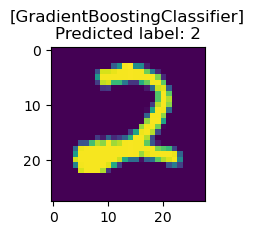

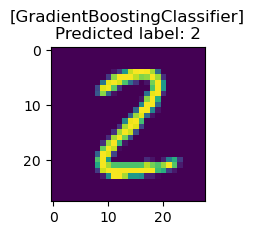

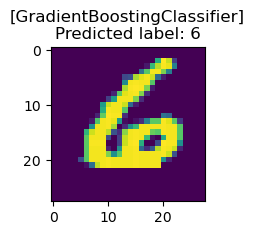

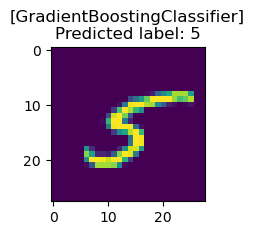

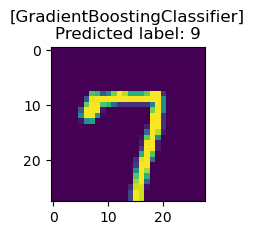

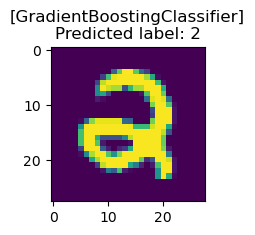

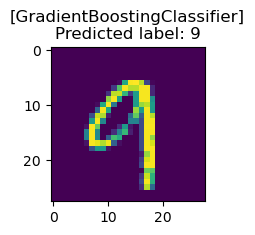

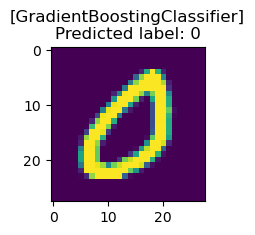

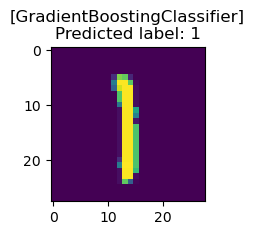

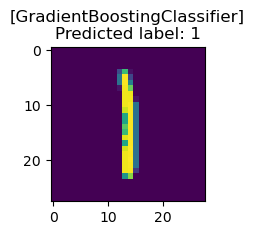

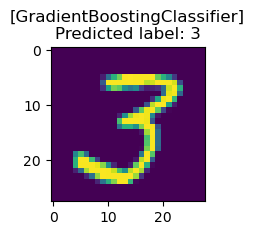

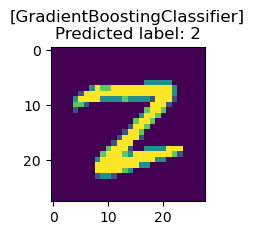

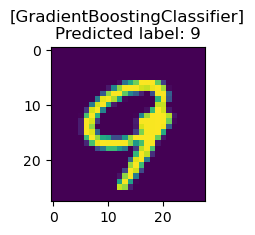

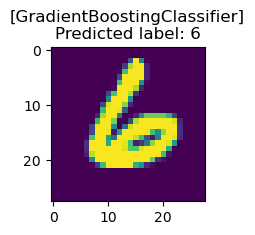

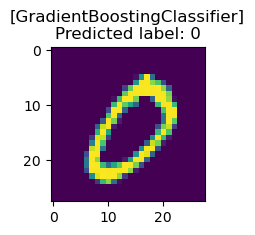

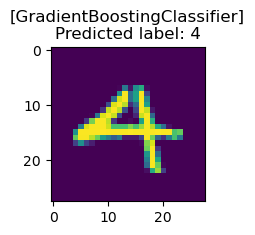

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

mod = GradientBoostingClassifier(
    n_estimators = 100, learning_rate = 1.0,
    max_depth = 1, random_state = seed
).fit(x_train, y_train)

evaluate_classifier("GradientBoostingClassifier", mod)

### c. After this, we'll build a `MLPClassifier`:

MLPClassifier
Accuracy Score: 0.9639285714285715
Demonstrating 20 predictions for images from `test.csv`


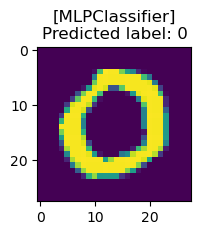

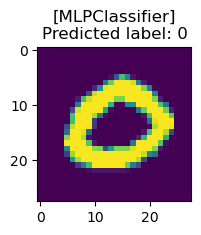

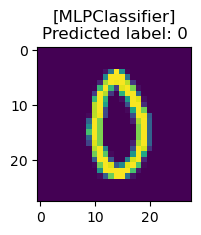

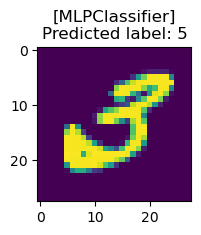

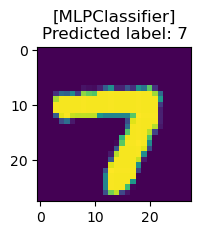

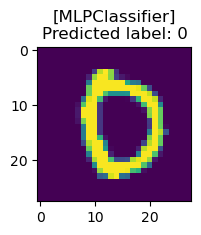

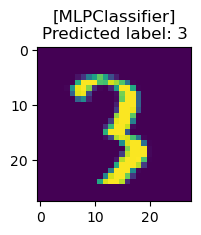

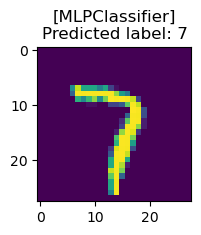

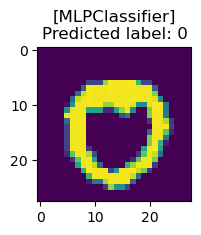

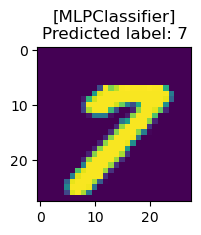

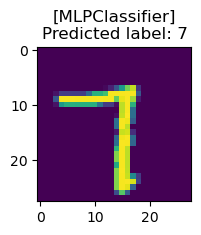

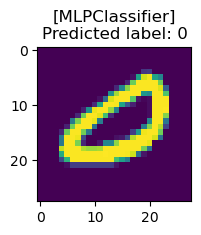

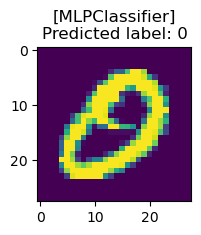

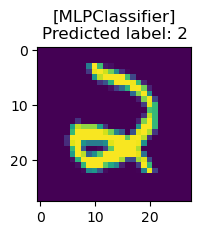

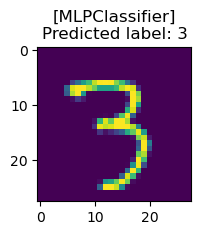

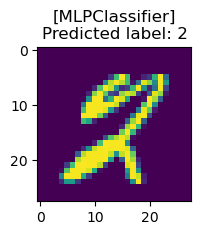

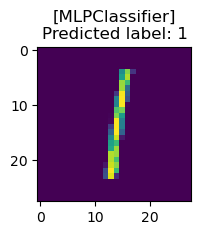

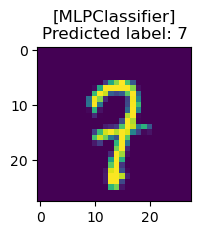

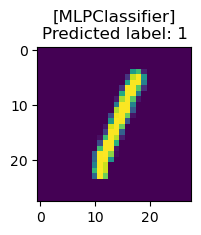

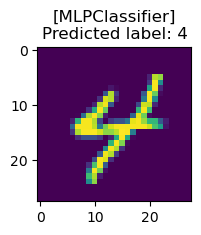

In [6]:
from sklearn.neural_network import MLPClassifier

mod = MLPClassifier(
    max_iter = 300, random_state = seed
).fit(x_train, y_train)

evaluate_classifier("MLPClassifier", mod)

### Conclusion  

#### As we can see, for classification of handwritten digits, `MLPClassifier` is the most accurate classifier with accuracy score of $96.393\%$.
#### Second most accurate one is `RandomForestClassifier` with score of $96.226\%$ and the least accurate one is `GradientBoostingClassifier` with accuracy score of $80.059\%$.